# Maximizing Home Value: Data-Insights on the Impact of Renovations in King County

**Authors:** Keziah Gicheha, Dave Omondi, Pamela Okinyo, Charles Ndegwa, Brian Kipng'eno

## Overview

This project aims to provide actionable insights for a real estate agency on how home renovations can increase the estimated value of homes in King County. The business problem addressed is the need to advise homeowners on the most impactful renovations to maximize their property's value. Using the King County House Sales dataset, which includes features such as bedrooms, bathrooms, living area square footage, and more, we employ multiple linear regression and other statistical methods to analyze the relationship between these features and home prices. Our results indicate that certain renovations, particularly those that include increasing living area and upgrading amenities, the number of bathrooms and bedrooms, significantly boost home value. Based on these findings, we recommend prioritizing specific types of renovations to achieve the highest return on investment for homeowners.

## Business Problem

The primary business problem is the need for a real estate agency to provide data-driven advice to homeowners on how home renovations can enhance the value of their properties. Homeowners often invest in renovations without clear guidance on which improvements will yield the highest return on investment. By addressing this pain point, the agency can offer more valuable services to clients, enhancing customer satisfaction and potentially increasing the agency's market share.


## Objectives 

1. To determine factors that significantly affect house prices.

2. To highlight key features that increase property value.

3. To suggest improvements or renovations to increase property attractiveness.

## Data Understanding

The data for this project is derived from the King County House Sales dataset. This dataset includes comprehensive information on house sales in King County, that also encompasses the city of Seattle and sorrounding area. The data provides insights into various aspects of house sales such as property features and sale prices.
***

* The data represents house sales transactions in King County. Each row corresponds to a unique house sale, and the columns provide details on various attributes of the properties sold. The sample consists of multiple house sales entries, each including the following variables: id, date, price, bedrooms, bathrooms, sqrt_living, sqft_loft, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot14.

* The target variable is is price, which represents the sale price of the house.

* Numerical Variables: Variables like price, sqft_living, sqft_lot, bedrooms, bathrooms, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, and sqft_lot15 are numerical and can be analyzed using various statistical and machine learning techniques.
* Categorical Variables: Variables like floors, waterfront, view, condition, and grade are categorical. These variables may need to be encoded appropriately for certain types of analysis.
* Geographical Variables: zipcode, lat, and long provide location-specific data, which can be used to analyze geographical trends in house sales.
* Temporal Variable: The date variable indicates when the transaction occurred and can be used to assess trends over time.
***

In [72]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

%matplotlib inline

Loading Data

In [73]:
data = pd.read_csv('Data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Inspecting and Cleaning the Data

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [75]:
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

## Data Preparation



In [76]:
# Checking for null values

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [77]:
# 'yr_renovated', fill missing values with 0 to show no renovation
data['yr_renovated'].fillna(0, inplace=True)

In [78]:
# 'waterfront' and 'view', fill missing values with the mode 
data['waterfront'].fillna(data['waterfront'].mode()[0], inplace=True)
data['view'].fillna(data['view'].mode()[0], inplace=True)

In [79]:
# Convert 'sqft_basement' to numeric
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce').fillna(0)

In [80]:
# Verifying changes 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Exploratory Data Analysis (EDA)

### Univariate Analysis
The stage involves an exploration process, which includes creating and visualizing histograms and box plots. This important step gives us insight into the distribution patterns of the data for each variable. By examining the histograms, we can understand the spread and frequency of values within each variable, forming a basis for further analysis. Box plots help us detect potential outliers.

In [81]:
# Checking on measures of central tendency and dispersion

price_mean = data["price"].mean()
price_mode = data["price"].mode()[0]
price_median = data["price"].median()
price_std = data["price"].std()

print("Mean:", price_mean)
print("Mode:", price_mode)
print("Median:", price_median)
print("Standard Deviation:", price_std)

Mean: 540296.5735055795
Mode: 350000.0
Median: 450000.0
Standard Deviation: 367368.1401013945


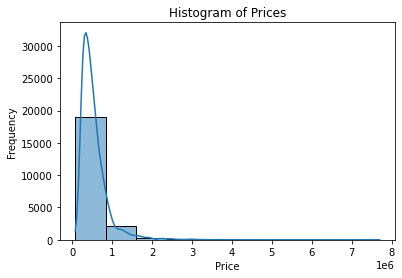

In [82]:
# Plotting a histogram of price

sns.histplot(data["price"], bins=10, kde=True, edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")
plt.show()

The distribution of house prices is right-skewed (positively skewed), indicating that most houses are relatively inexpensive, while a small number of houses are very expensive. Most houses priced below $1,000,000.

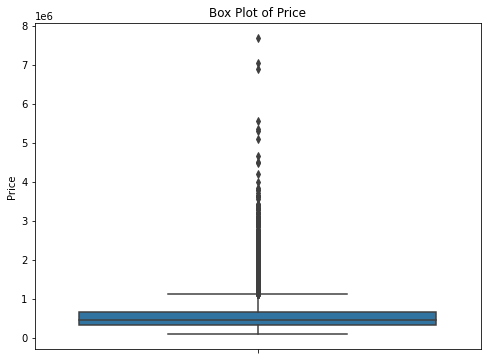

In [83]:
# Checking for outliers in the price variable
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['price'])
plt.ylabel("Price")
plt.title('Box Plot of Price')
plt.show()

Based on the box plot, there are outliers present, but we chose to retain them, assuming they accurately reflect the real-world dataset.

In [84]:
# Summary statistics
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


This gives us a comprehensive overview of our data. Some key points include:

1. Home prices range from $78,000 to $7,700,000.
2. Most homes are priced between $322,000 and $645,000.
3. The average home has 3.3 bedrooms and 2.1 bathrooms, with approximately 2,080 square feet of living space.
4. All homes have between 1 and 3.5 floors.
5. We observed a listing for a home with 33 bedrooms. This might be an extreme outl

## Bivariate Analysis

Bivariate analysis focuses on determining the correlation between two variables. At this stage we will use a heatmap and scatterplot to check on correlation and collinearity of the variables.

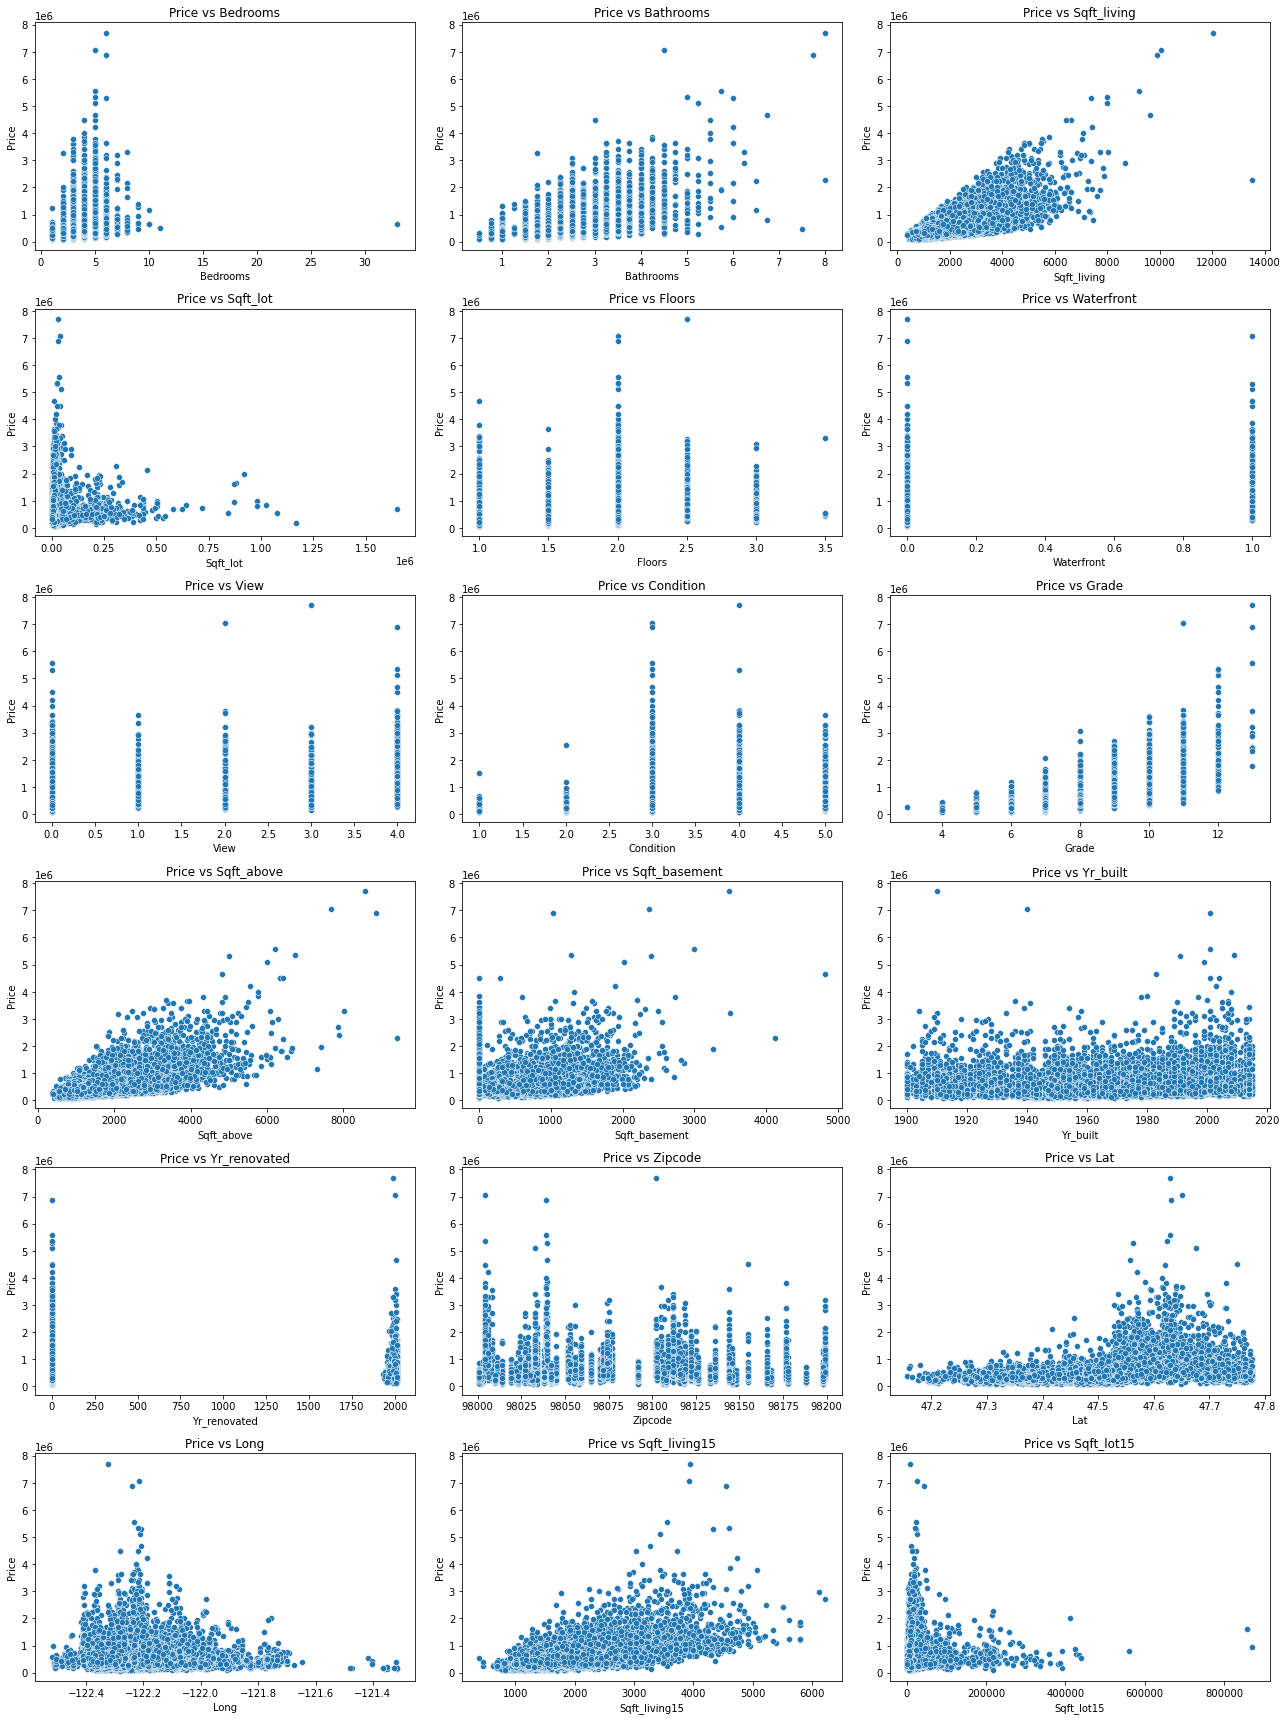

In [85]:
# Define the target variable and features to plot against
target = 'price'
features_to_plot = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

# Create scatterplots
num_features = len(features_to_plot)
num_rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)

plt.figure(figsize=(18, 4 * num_rows))

for i, feature in enumerate(features_to_plot):
    plt.subplot(num_rows, 3, i+1)
    sns.scatterplot(x=feature, y=target, data=data)
    plt.title(f'Price vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [86]:
# Calculating the correlation matrix

corr_matrix = data.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


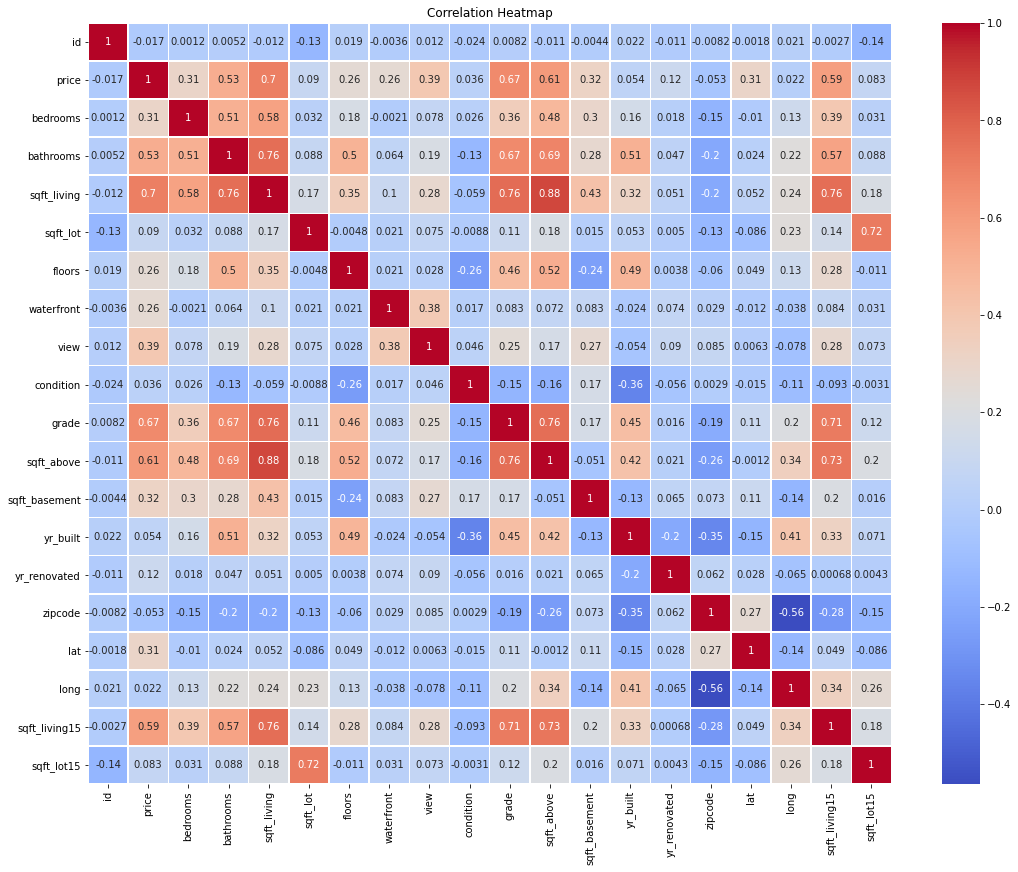

In [87]:
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* sqft_living has a strong positive correlation with price (0.70).
* grade also shows a strong positive correlation with price (0.67).
* sqft_above and bathrooms have moderate positive correlations with price (0.61 and 0.53 respectively).
* sqft_living15 has a positive correlation (0.59).

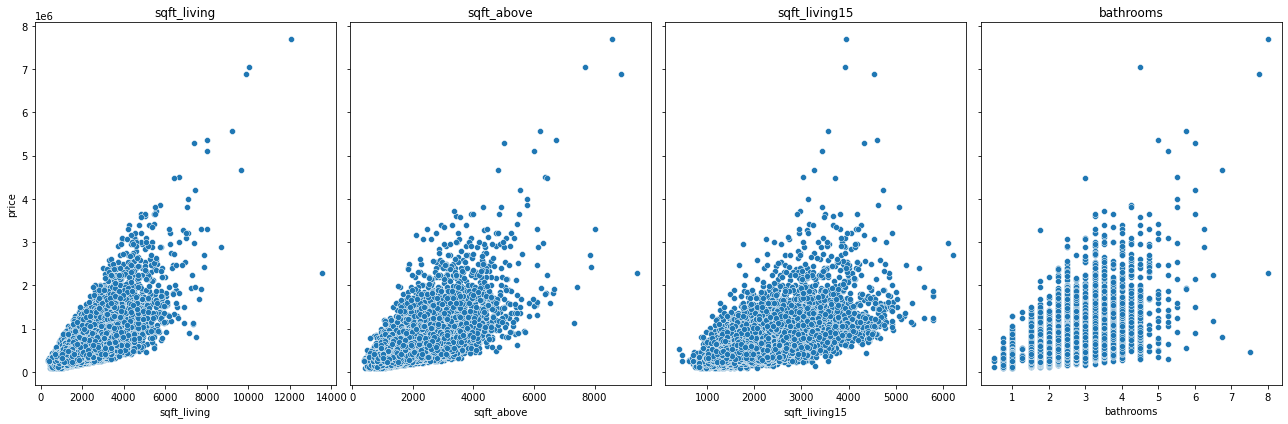

In [88]:
# Scatter plots - Plotting each predictor against the target variable

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']):
    sns.scatterplot(data=data, x=channel, y='price', ax=axs[idx])
    axs[idx].set_title(channel)
plt.tight_layout() 
plt.show()

### Plotting Categorical Values

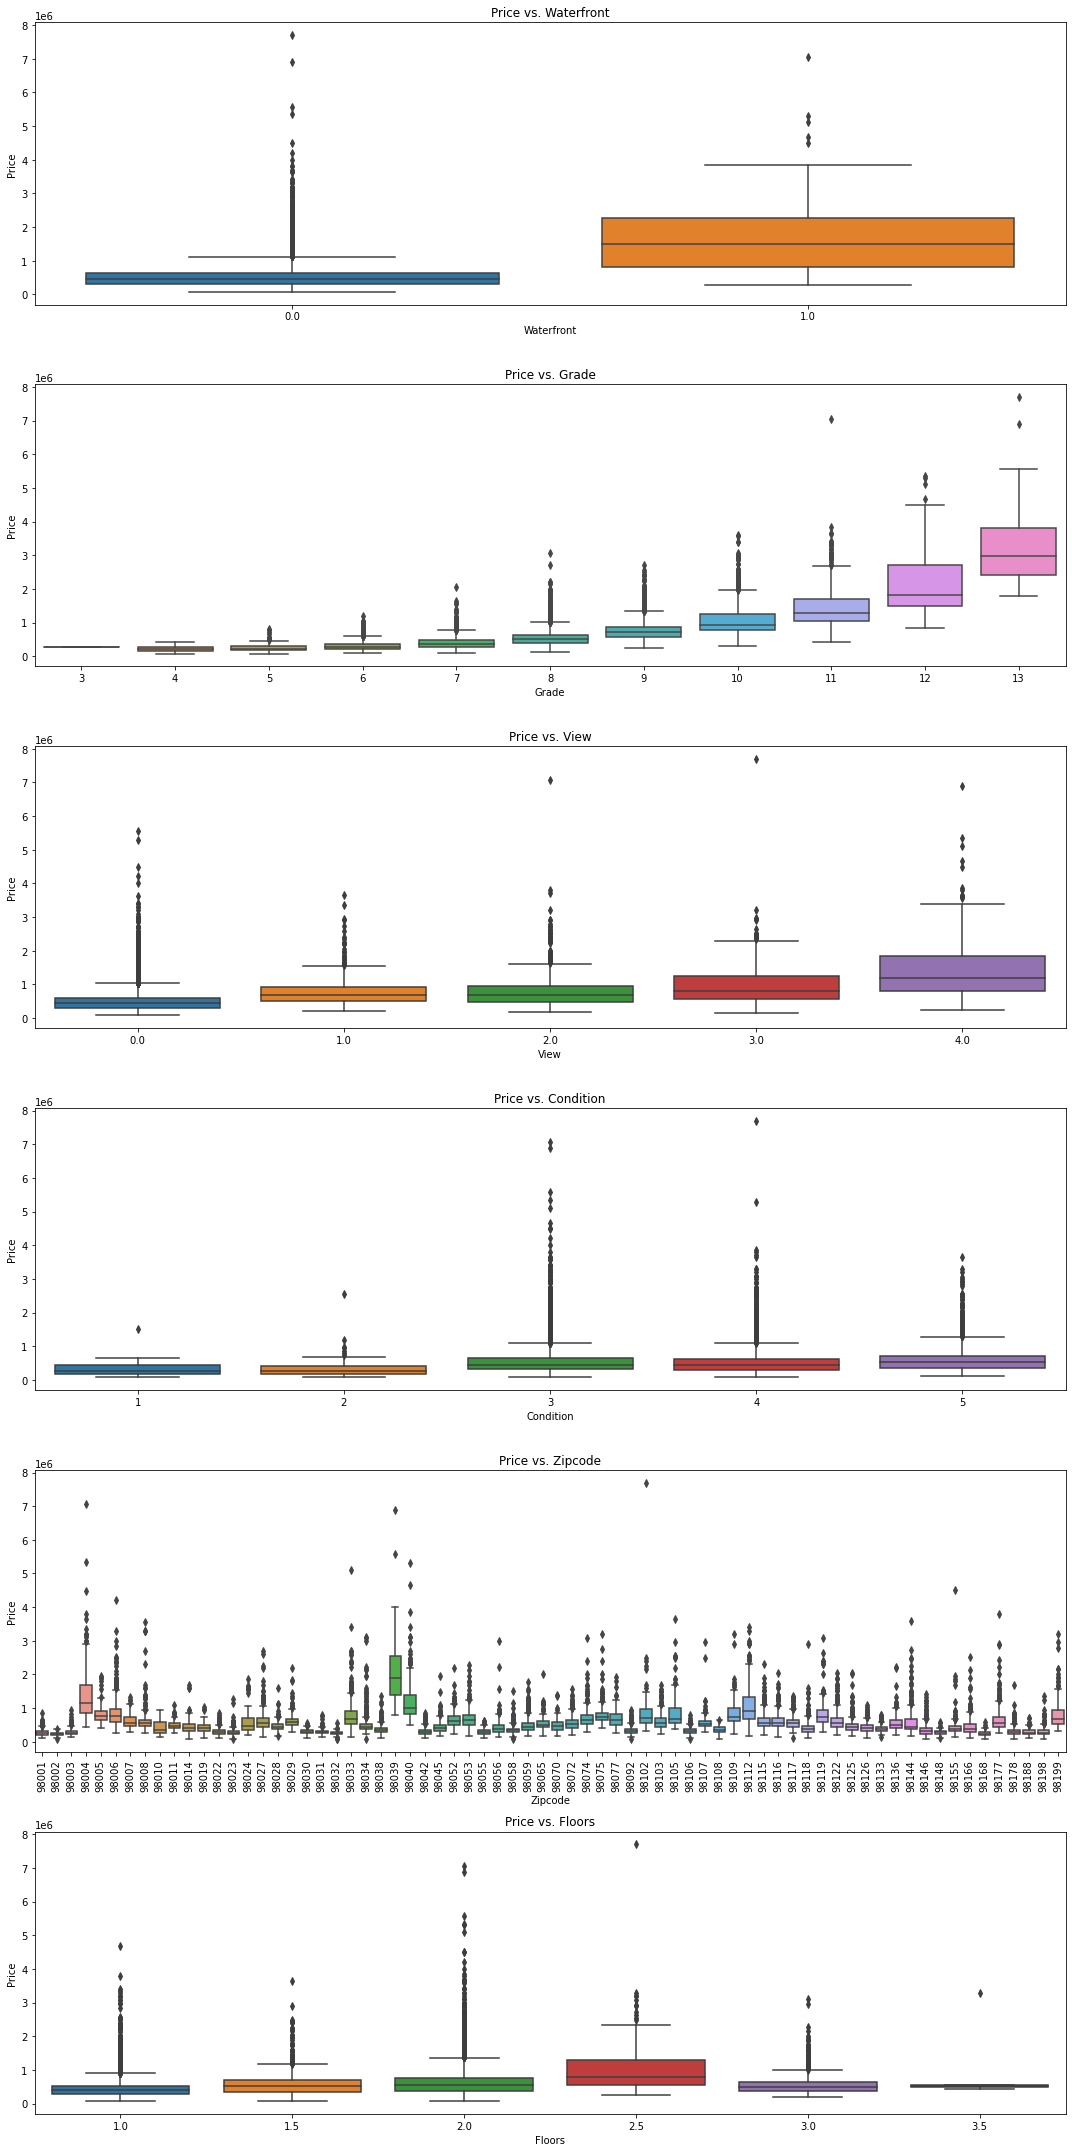

In [89]:
# Box plots
categorical_features = ['waterfront', 'grade', 'view', 'condition', 'zipcode', 'floors']


fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(15, 5 * len(categorical_features)))

for ax, feature in zip(axes, categorical_features):
    sns.boxplot(x=feature, y='price', data=data, ax=ax)
    ax.set_title(f'Price vs. {feature.capitalize()}')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Price')
    if feature == 'zipcode':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Houses with betterviews , higher grades(ratings), with the presence of a waterfront, better conditions tend to be priced higher, and the zipcode also has an influence on the price.
The house price increases steadily as the number of floors increases only to a certain limit (3 floors) then decreases when the floors become greater than 3.

## Data Modeling

## Preprocessing

In [90]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns= categorical_features, drop_first=True)


## Baseline Model
For the baseline model, we will do a simple linear regression, using the most highly correlated feature and then we improve our model from there.

In [91]:
X = data['sqft_living']
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:09:01   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.802e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.645e+04   4961.972     -9.361      

## Interpretation of Results
1. The R-squared value of 0.492 indicates that the model explains about 49.2% of the variance in house prices based on the living area (sqft_living).
2. The relationship between sqft_living and price is highly significant as shown by the F-statistic which is high, 16760 with each additional square foot increasing the price by approximately $282.20.
3. The RMSE suggests that there is a substantial error in the model's predictions, indicating that additional features or a more complex model might be needed to improve accuracy.

## First Iteration
Here we perform the first iteration whereby we have included more features into the model.

The following features have been added:

sqft_above
sqft_living15
bathrooms

In [92]:
features = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms'] 

X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     4348.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:09:01   Log-Likelihood:            -2.3996e+05
No. Observations:               17277   AIC:                         4.799e+05
Df Residuals:                   17272   BIC:                         4.800e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.043e+05   6881.341    -15.151

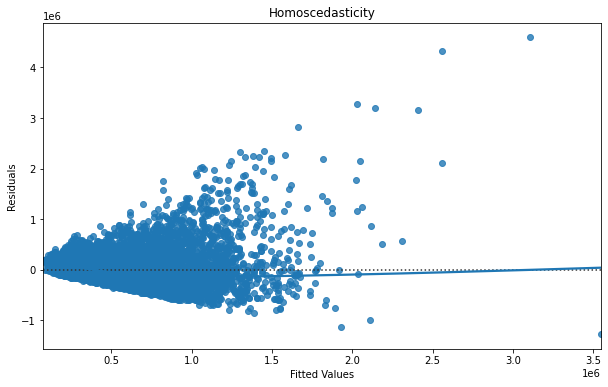

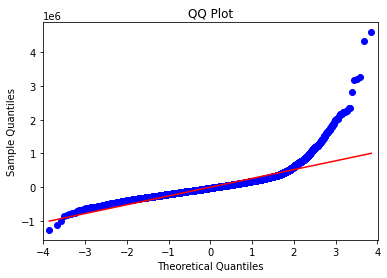

In [93]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

# Interpretation of Results
1. The R-quared of 0.50 indicates that approximately 50% of the variance in the dependent variable (price) can be explained by the model's independent variables.
2. The plot for testing homoscedasticity indicates that the residuals display heteroscedasticity due to their divergence/variation. This suggests skewness, a heavy-tailed distribution, or the presence of outliers in the dataset.
3. In the QQ plot, the residuals deviate from the line, particularly in the tails, indicating that the residuals are not normally distributed.

The following categorical features have been added:

1.waterfront
2. view
3. condition
4. grade
5. zipcode
6. floors

In [94]:
features = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms'] + \
           [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floors' in col]
X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     925.8
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:10:30   Log-Likelihood:            -2.3018e+05
No. Observations:               17277   AIC:                         4.606e+05
Df Residuals:                   17179   BIC:                         4.613e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8702.8017   1.53e+05     -0.

Checking Assumptions

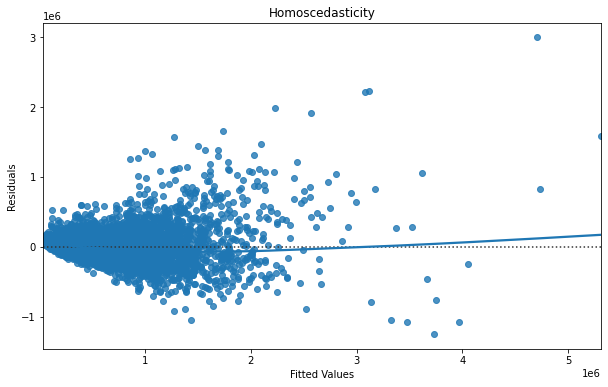

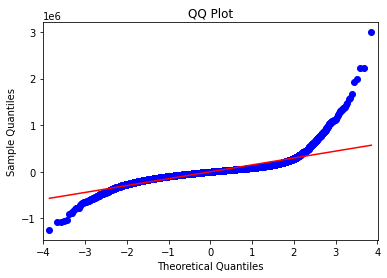

In [95]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Interpretation of Results
1. The R-quared of 0.839 indicates that approximately 83% of the variance in the dependent variable (price) can be explained by the model's independent variables.
2. The plot for testing homoscedasticity indicates that the residuals display heteroscedasticity due to their divergence/variation. This suggests skewness, a heavy-tailed distribution, or the presence of outliers in the dataset.
3. In the QQ plot, the residuals deviate from the line, particularly in the tails, indicating that the residuals are not normally distributed

## Second Iteration
In this iteration, we identify and eliminate predictors that exhibit high multicollinearity.

In [96]:
# Checking for Multicollinearity in our predictors

corr_matrix = data.corr().abs()


corr_data = corr_matrix.unstack().reset_index().sort_values(by=0, ascending=False)
corr_data['pairs'] = list(zip(corr_data.level_0, corr_data.level_1))


corr_data = corr_data[corr_data['level_0'] != corr_data['level_1']]
corr_data = corr_data.drop_duplicates(subset='pairs')


corr_data.columns = ['level_0', 'level_1', 'corr_coef', 'pairs']


high_corr_pairs = corr_data[(corr_data['corr_coef'] > 0.8) & (corr_data['corr_coef'] < 1)]

# Viewing the highly correlated predictor pairs
high_corr_pairs

,level_0,level_1,corr_coef,pairs
224,sqft_above,sqft_living,0.876448,"(sqft_above, sqft_living)"
91,sqft_living,sqft_above,0.876448,"(sqft_living, sqft_above)"


In [97]:
# Dropping sqft_living

features = ['sqft_above', 'sqft_living15', 'bathrooms'] + \
           [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floor' in col]
X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     881.3
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:11:56   Log-Likelihood:            -2.3061e+05
No. Observations:               17277   AIC:                         4.614e+05
Df Residuals:                   17180   BIC:                         4.622e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.986e+04   1.57e+05     -0.

In [98]:
# Dropping sqft_above

features = ['sqft_living', 'sqft_living15', 'bathrooms'] + \
           [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floor' in col]
X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     925.5
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:11:57   Log-Likelihood:            -2.3026e+05
No. Observations:               17277   AIC:                         4.607e+05
Df Residuals:                   17180   BIC:                         4.615e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2002.8993   1.54e+05     -0.

## Checking Assumptions

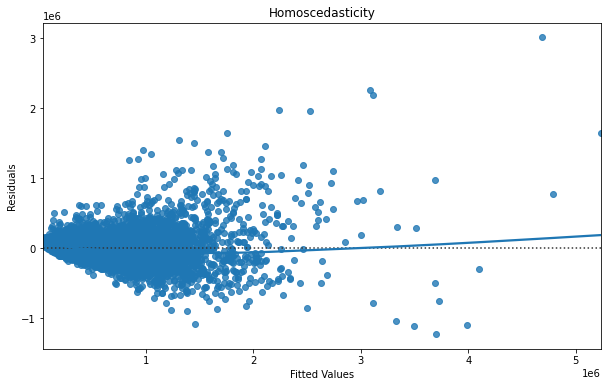

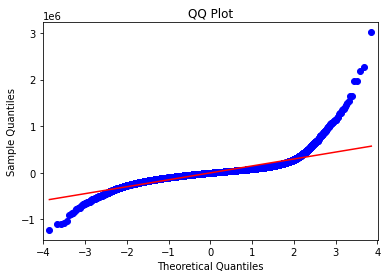

In [99]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Interpretation of Results
1. The R-quared of 0.838 indicates that approximately 83% of the variance in the dependent variable (price) can be explained by the model's independent variables.
2. The model performed better after dropping sqft_living

## Third Iteration
In this iteration, we attempted to eliminate outliers from our dataset to assess their effect on our model's performance

In [100]:
features = ['sqft_living', 'sqft_living15', 'bathrooms']
X = data_encoded[features]
y = data_encoded['price']

# Combine features and target variable into a single DataFrame for easier outlier removal
data_combined = pd.concat([X, y], axis=1)

# Calculate IQR for each feature
Q1 = data_combined.quantile(0.25)
Q3 = data_combined.quantile(0.75)
IQR = Q3 - Q1


outliers = (data_combined < (Q1 - 1.5 * IQR)) | (data_combined > (Q3 + 1.5 * IQR))

# Remove outliers
data_cleaned = data_combined[~outliers.any(axis=1)]

# Separate features and target variable after removing outliers
X_cleaned = data_cleaned[features]
y_cleaned = data_cleaned['price']

# Add categorical features back to the cleaned data
categorical_features = [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floors' in col]

# Ensure all categorical columns are present in data_cleaned
for col in categorical_features:
    if col not in data_cleaned.columns:
         data_cleaned[col] = data_encoded[col]

# Combine cleaned numerical features with categorical features
X = pd.concat([X_cleaned, data_cleaned[categorical_features]], axis=1)
y = y_cleaned

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)


model = sm.OLS(y_train, X_train_const).fit()


y_pred = model.predict(X_test_const)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(model.summary())
print(f'RMSE: {rmse}')

<ipython-input-100-0fc32d7ae6c9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_encoded[col]


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     762.2
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:13:56   Log-Likelihood:            -2.0332e+05
No. Observations:               15924   AIC:                         4.068e+05
Df Residuals:                   15829   BIC:                         4.076e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4650.5841   8.75e+04     -0.

### Checking Assumptions

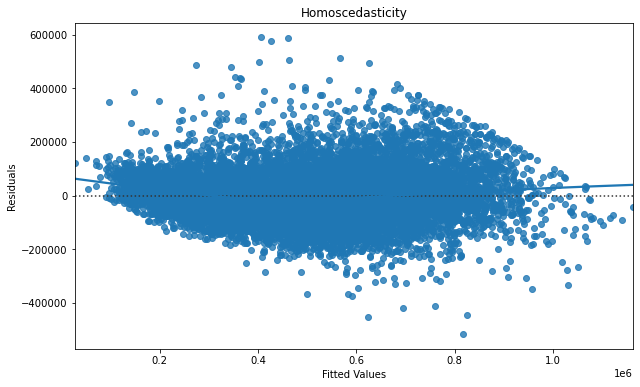

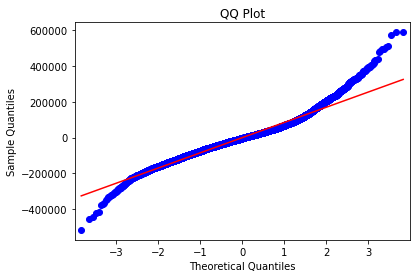

In [101]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Interpretation of Results
1. The R-quared of 0.838 indicates that approximately 83% of the variance in the dependent variable (price) can be explained by the model's independent variables.
2. The model meets the test for homoscedasticity 

## Final Model
In this iteration, we apply normalization and log-transformations to the data. These steps will reduce the impact of outliers, making the dataset more robust and enhancing the linear relationship between the target variable (price) and the features.

In [102]:
X = pd.concat([X_cleaned, data_cleaned[categorical_features]], axis=1)
y = y_cleaned

# Apply log transformation to the numerical features
numerical_features = ['sqft_living', 'sqft_living15', 'bathrooms']
X[numerical_features] = X[numerical_features].apply(lambda x: np.log(x + 1))  
y = np.log(y + 1) 

# Normalize the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred_log = model.predict(X_test_const)

# Transform predictions back to the original scale
y_pred = np.exp(y_pred_log) - 1
y_test_original = np.exp(y_test) - 1

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     833.0
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:15:32   Log-Likelihood:                -8318.3
No. Observations:               15924   AIC:                         1.683e+04
Df Residuals:                   15829   BIC:                         1.756e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9488      0.421     -2.

### Checking Assumptions

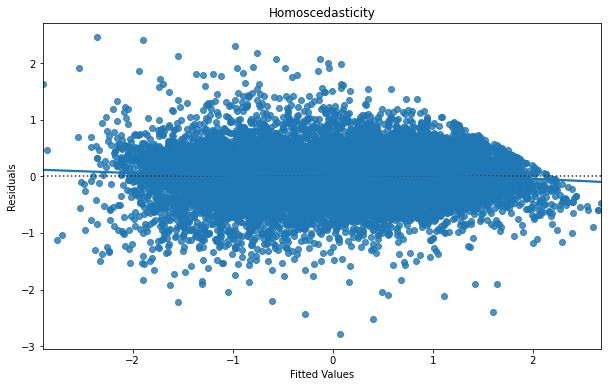

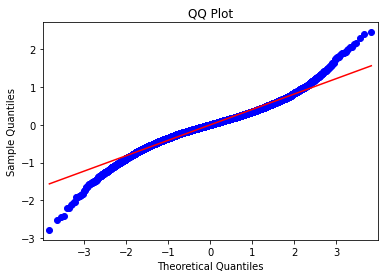

In [103]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Interpretation of Results
1. The R-quared of 0.838 indicates that approximately 83% of the variance in the dependent variable (price) can be explained by the model's independent variables.

2. The model meets the test for homoscedasticity 

## Model Validation


Model Validation
In this project, the model's validation was conducted using the following approaches:

1. Residual Analysis:

    Homoscedasticity: Residual plots were used to check for homoscedasticity, ensuring that residuals had constant variance across all levels of the predicted values. This is important for validating the assumptions of linear regression. 

    Normality of Residuals: QQ plots were used to examine if the residuals followed a normal distribution, which is another key assumption for linear regression.

2. Root Mean Squared Error (RMSE):

    The RMSE was computed for the test set predictions to quantify the model's prediction error. Lower RMSE values indicate better model performance. RMSE was used at different iterations to compare models and determine improvements.

3. R-Squared and Adjusted R-Squared:

    These metrics were used to evaluate the proportion of variance in the dependent variable (house prices) explained by the independent variables. An increase in R-Squared from one iteration to the next indicated improved model performance.

4. Train-Test Split:

    Data was split into training and testing sets (80-20 split) to evaluate the model on unseen data. This helps in assessing the model's ability to generalize to new data.

## Contribution of Predictors

In [104]:
# Calculate contributions in the original scale
# Reverse transformations
X_train_scaled = scaler.inverse_transform(X_train[numerical_features])
X_train_original = np.exp(X_train_scaled) - 1

# Combine back with categorical features
X_train_original = pd.DataFrame(X_train_original, columns=numerical_features)
X_train_original = pd.concat([X_train_original.reset_index(drop=True), X_train.drop(columns=numerical_features).reset_index(drop=True)], axis=1)

# Calculate the average value of each feature excluding the constant term
feature_means_original = X_train_original.mean()

# Extract coefficients excluding the constant term
coefficients = model.params.drop('const')

# Calculate the contribution of each feature in the original scale
contribution = coefficients * feature_means_original

# Create a DataFrame to display the results
contribution_df = pd.DataFrame({
    'Feature': contribution.index,
    'Coefficient': coefficients.values,
    'Mean Value': feature_means_original.values,
    'Contribution to Price': contribution.values
})

contribution_df

,Feature,Coefficient,Mean Value,Contribution to Price
0,sqft_living,0.334137,466380.159941,155834.805243
1,sqft_living15,0.122880,468428.535872,57560.394394
2,bathrooms,0.015160,465609.871809,7058.575038
3,waterfront_1.0,0.747095,0.002324,0.001736
4,grade_4,-1.162010,0.001193,-0.001386
...,...,...,...,...
91,floors_1.5,0.076315,0.089613,0.006839
92,floors_2.0,-0.006088,0.354245,-0.002157
93,floors_2.5,-0.010785,0.005275,-0.000057
94,floors_3.0,-0.219063,0.028699,-0.006287


## Conclusion
After several iterations of refining the model, the final model showed significant improvements:

Final Model Performance - The R-Squared value improved to 0.83, indicating that 83% of the variance in house prices can be explained by the model's features. The RMSE of the final model (0.7995) was significantly lower than the initial baseline model (256860.6115), indicating better predictive performance.

## Recommendations
1. Increase Living Area (sqft_living)- This feature has the highest positive impact on house prices. Each additional square foot significantly increases the home's value by approximately 0.33 x mean value. The agency should consider adding extensions or converting unused spaces into livable areas to increase the total living area of their homes.

2. Improve Condition - The overall condition of the house has a significant impact on its value. Houses in better condition contribute considerably to the price. The agency should ensure regular maintenance and upgrades to improve the house's condition are essential.

3. Upgrade Grade - The grade of the house shows substantial contributions to the house price. Higher grades are associated with higher values.

4. Focus on View Quality - The presence of a good view significantly boosts house prices. We recommend enhancing or creating better views.

5. Waterfront Properties - The presence of a waterfront view (waterfront_1.0) significantly increases house prices.


## Next Steps

1. Feature Engineering - Create new features such as price per square foot, age of the property, and distance to key amenities. Consider the impact of renovations by calculating the difference between yr_built and yr_renovated.

2. Geospatial Analysis - Use latitude and longitude data to visualize property locations and analyze spatial patterns. Identify hotspots for high-value properties and areas with potential for growth.